# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# Carregando o arquivo CSV
caminho_arquivo = "credito_modelo.csv"
with open(caminho_arquivo, "r", encoding="latin1") as f:
    linhas = f.readlines()

# Separando o cabeçalho e os dados
cabecalho = linhas[0].strip().replace('"', '').split(",")
dados = [linha.strip().replace('"', '').split(",") for linha in linhas[1:]]

# Criando o DataFrame
base = pd.DataFrame(dados, columns=cabecalho)

# Ajustando formatação numérica e convertendo os tipos
base = base.apply(lambda col: col.str.replace(",", ".", regex=False))
base = base.apply(pd.to_numeric, errors="ignore")

# Convertendo as variáveis booleanas (True/False) para 0 e 1
base = base.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))

# Garantido que a variável resposta 'mau' seja numérica
base["mau"] = base["mau"].astype(int)

# Separando as variáveis explicativas (X) e variável resposta (y)
X = base.drop(columns=["mau"])
y = base["mau"]

# Dividindo a base em treino (70%) e validação (30%)
X_treino, X_validacao, y_treino, y_validacao = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Exibindo o resumo das bases geradas
print("Tamanho da base de TREINAMENTO:", X_treino.shape, y_treino.shape)
print("Tamanho da base de VALIDAÇÃO:", X_validacao.shape, y_validacao.shape)

C:\Users\brunn\AppData\Local\Temp\ipykernel_21372\2268947029.py:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  base = base.apply(pd.to_numeric, errors="ignore")
C:\Users\brunn\AppData\Local\Temp\ipykernel_21372\2268947029.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  base = base.applymap(lambda x: 1 if str(x).lower() == "true" else (0 if str(x).lower() == "false" else x))


Tamanho da base de TREINAMENTO: (11655, 25) (11655,)
Tamanho da base de VALIDAÇÃO: (4995, 25) (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

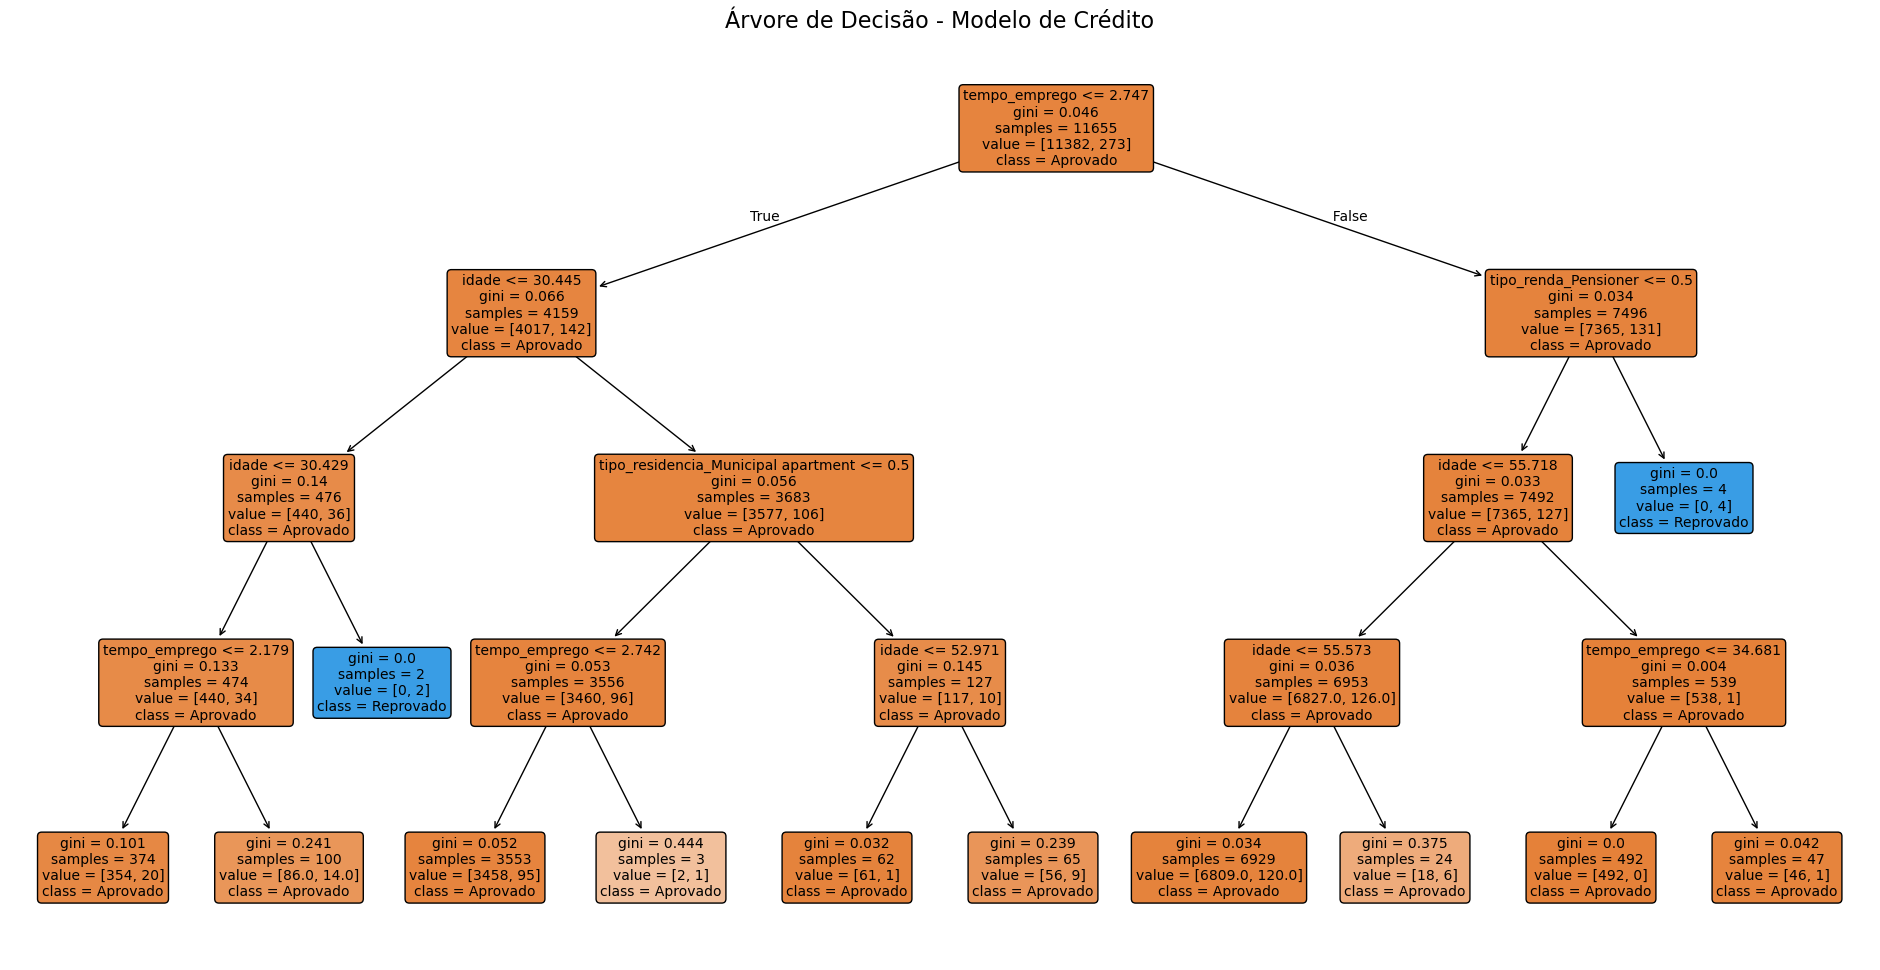

In [6]:
# Aqui crio o modelo da Árvore de Decisão
modelo_arvore = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,          
    random_state=42
)

# Treino o modelo com os dados de treinamento
modelo_arvore.fit(X_treino, y_treino)

# Visualizo a árvore 
plt.figure(figsize=(24, 12)) 
plot_tree(
    modelo_arvore,
    feature_names=X_treino.columns,
    class_names=["Aprovado", "Reprovado"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árvore de Decisão - Modelo de Crédito", fontsize=16)
plt.show()

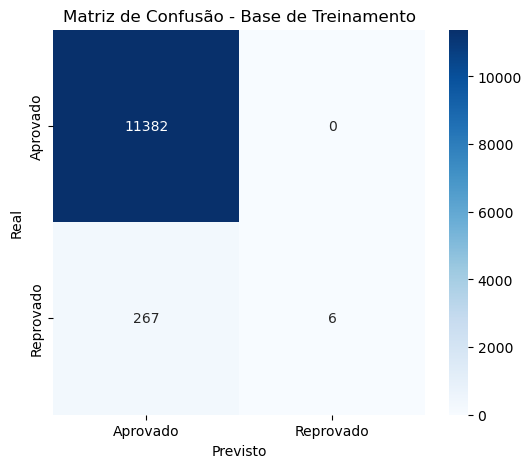

Acurácia na base de treinamento: 97.71%


In [7]:
# As previsões sao feitas na base de treinamento
y_pred_treino = modelo_arvore.predict(X_treino)

# Gero e visualizo a Matriz de Confusão
matriz = confusion_matrix(y_treino, y_pred_treino)

plt.figure(figsize=(6, 5))
sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Aprovado", "Reprovado"],
            yticklabels=["Aprovado", "Reprovado"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Base de Treinamento")
plt.show()

# Por fim, calculo a acurácia
acuracia_treino = accuracy_score(y_treino, y_pred_treino)
print(f"Acurácia na base de treinamento: {acuracia_treino:.2%}")

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# 1 Classifique a base de teste de acordo com a árvore que você treinou no item 2.

# Classificar a base de validação (teste)
y_pred_validacao = modelo_arvore.predict(X_validacao)

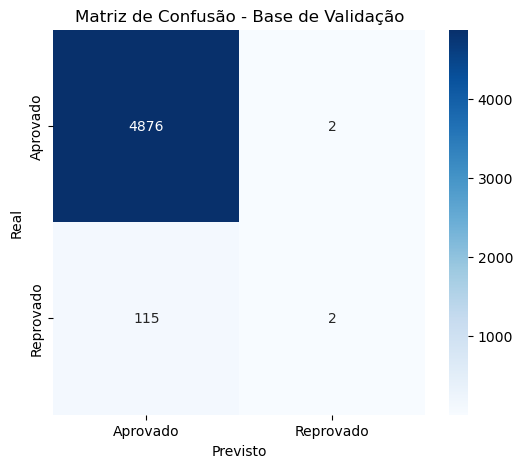

In [10]:
# 2 Produza a visualização da matriz de confusão para a base de teste.

# Gerar a matriz de confusão
matriz_validacao = confusion_matrix(y_validacao, y_pred_validacao)

# Criar o gráfico (heatmap)
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_validacao, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Aprovado", "Reprovado"],
            yticklabels=["Aprovado", "Reprovado"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Base de Validação")
plt.show()

In [11]:
# 3 Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

# Calcular a acurácia na base de validação
acuracia_validacao = accuracy_score(y_validacao, y_pred_validacao)
print(f"Acurácia na base de validação: {acuracia_validacao:.2%}")

# Calcular (ou reutilizar) a acurácia da base de treinamento
# (se você já calculou antes, pode apenas imprimir novamente)
acuracia_treino = accuracy_score(y_treino, y_pred_treino)
print(f"Acurácia na base de treinamento: {acuracia_treino:.2%}")

# Comparar as duas
diferenca = acuracia_treino - acuracia_validacao
print(f"Diferença entre treino e validação: {diferenca:.2%}")

Acurácia na base de validação: 97.66%
Acurácia na base de treinamento: 97.71%
Diferença entre treino e validação: 0.05%


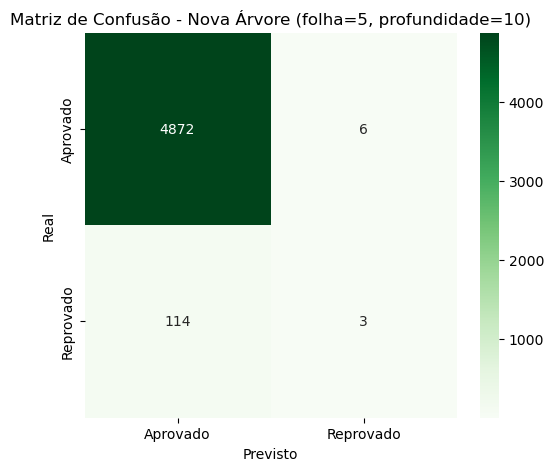

Acurácia da nova árvore (base de validação): 97.60%
Proporção de proponentes classificados como 'maus': 0.18%


In [12]:
# 4 Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10.

# Crio o modelo com os parâmetros solicitados
nova_arvore = DecisionTreeClassifier(
    criterion="gini",
    min_samples_leaf=5,   # número mínimo de observações por folha
    max_depth=10,         # profundidade máxima da árvore
    random_state=123
)

# Aqui treino o modelo com a base de treinamento
nova_arvore.fit(X_treino, y_treino)

# Previsões na base de validação
y_pred_validacao_nova = nova_arvore.predict(X_validacao)

# Avalio a matriz de classificação
matriz_nova = confusion_matrix(y_validacao, y_pred_validacao_nova)

plt.figure(figsize=(6, 5))
sns.heatmap(matriz_nova, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Aprovado", "Reprovado"],
            yticklabels=["Aprovado", "Reprovado"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Nova Árvore (folha=5, profundidade=10)")
plt.show()

# Calcular e exibir acurácia
acuracia_nova = accuracy_score(y_validacao, y_pred_validacao_nova)
print(f"Acurácia da nova árvore (base de validação): {acuracia_nova:.2%}")

# Proporção de proponentes classificados como 'maus' ===
proporcao_maus = (y_pred_validacao_nova.sum() / len(y_pred_validacao_nova)) * 100
print(f"Proporção de proponentes classificados como 'maus': {proporcao_maus:.2f}%")

In [16]:
# 5 Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

# Criar uma previsão onde todos são classificados como 'bons' (0)
y_pred_todos_bons = [0] * len(y_validacao)

# Calcular a acurácia dessa previsão ingênua
acuracia_todos_bons = accuracy_score(y_validacao, y_pred_todos_bons)

print(f"Acurácia caso todos fossem classificados como 'bons': {acuracia_todos_bons:.2%}")

Acurácia caso todos fossem classificados como 'bons': 97.66%
